This notebook documents my exploration of the catch rates for each 5 degree x 5 degree in the West Pacific Ocean from 1950 - 2014

In [5]:
# This code is to load the necessary R packages for my analysis
library(readr)
library(readxl)
library(haven)
library(plyr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(RColorBrewer)
library(stringr)
library(tidyverse)



In [14]:
# Installing all of the packages that are not defaultly included in jupyter 'r essentials'
install.packages("ggjoy", "/Users/danielcoolidge/anaconda/lib/R/library")
install.packages("devtools", "/Users/danielcoolidge/anaconda/lib/R/library")
install.packages("Rmisc", "/Users/danielcoolidge/anaconda/lib/R/library")

library(ggjoy)
library(devtools) 
library(Rmisc) 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘memoise’, ‘whisker’, ‘rstudioapi’, ‘git2r’, ‘withr’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice


Data:

All data is broken down spatially. There are 3 sets of data that I looked at specifically. 

1. Raw Spatial Catch Data
    I created "catches_spatial_post95.csv" by copying the catch data from one of Sally's Excel files. I then read the .csv file directly into R.
    
 ######   File: CatchRateAnalysis
 ######  Tab: BestEstimateIUU
 ######    Description: Total LL Catch (tons)
 
I similarly created "catches_spatial.csv" from data in an Excel file of Sally's. This time, I had to manipulate the data to a structure that was consistent with the catch data from 1995 onward. 

 ######   File: Catch_Lat_Long_rawdata-dc
 ######  Tab: LL_spatial_catches_values_only
 ######    Description: catches is measured using the variable TOT_C --- total catch in metric tons
    
2. Raw Spatial Hook Data

I created "catches_spatial_post95.csv" by copying the catch data from one of Sally's Excel files. I then read the .csv file directly into R.
    
 ######   File: CatchRateAnalysis
 ######  Tab: BestEstimateIUU
 ######    Description: Total LL Catch (tons)

I similarly created "hooks_spatial.csv" from data in an Excel file of Sally's. This time, I had to manipulate the data to a structure that was consistent with the catch data from 1995 onward. 

 ######   File: Catch_Lat_Long_rawdata-dc
 ######  Tab: LL_spatial_hooks_values_only
 ######    Description: hooks is measured using the variable HHOOKS	--- Hundreds of hooks (longline effort)

3. Catch Rates (catch / hook) calculated in Excel






In [16]:
################## DATA IMPORT ###################

#### read in relevant catch rates

# raw catch data (spatial)
catches_spatial_pre98 <- read_csv("data/catches_spatial.csv")
catch_post95 <- read_csv("data/catches_spatial_post95.csv")

# raw hook data (spatial)
hooks_spatial_pre99 <- read_csv("data/hooks_spatial.csv")
hooks_post95 <- read_csv("data/hooks_spatial_post95.csv", skip = 1) 

# catch rates calculated from Excel
cr_spatial_post95 <- read_csv("data/cr.csv")
cr_spatial_pre98 <- read_csv("data/cr_1950plus.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  lat = col_integer(),
  lat_dir = col_character(),
  long = col_integer(),
  long_dir = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  lat = col_integer(),
  lat_dir = col_character(),
  long = col_integer(),
  long_dir = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  lat = col_integer(),
  lat_dir = col_character(),
  long = col_integer(),
  long_dir = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  LAT = col_integer(),
  LAT_D = col_character(),
  LONG = col_integer(),
  LONG_D = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  lat = col_integer(),
  lat_dir = col_character(),
  lon

In [38]:
#Set working directory to tuna folder
setwd("/Users/danielcoolidge/Dropbox/Novametrics/tuna")

In [39]:
# quick glance at our data sets

head(cr_spatial_post95)
head(cr_spatial_pre98)
head(catches_spatial_pre98)
head(catch_post95)

# raw hook data (spatial)
head(hooks_spatial_pre99) 
head(hooks_post95)  

lat,lat_dir,long,long_dir,1995,1996,1997,1998,1999,2000,⋯,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,N,115,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,120,E,0.03296065,0.02920396,0.02718147,0.02896613,0.02544705,0.02440268,⋯,0.02730401,0.02579964,0.02177332,0.02377018,0.02118649,0.02037051,0.02282663,0.02156693,0.02623859,0.02410252
0,N,125,E,0.03304562,0.02938372,0.02767304,0.02924967,0.02570688,0.02462529,⋯,0.02749817,0.02579970,0.02204481,0.02377006,0.02126856,0.02047290,0.02282659,0.02156687,0.02623858,0.02410853
0,N,130,E,0.04400800,0.03671724,0.03464836,0.03610208,0.02908000,0.02818177,⋯,0.02949716,0.02787585,0.02781504,0.02958485,0.02694960,0.02473682,0.02578623,0.02565934,0.03022633,0.02510482
0,N,135,E,0.04272254,0.03512817,0.04011597,0.03307051,0.02795598,0.03267949,⋯,0.02676693,0.02728439,0.02790303,0.03042300,0.02695293,0.02701116,0.03958935,0.03009115,0.04903986,0.03226637
0,N,140,E,0.03948453,0.03277901,0.03381013,0.03208140,0.03431254,0.03186068,⋯,0.02355431,0.02512385,0.01808017,0.02930060,0.03181068,0.02975118,0.03429920,0.03376208,0.03331460,0.03482316


lat,lat_dir,long,long_dir,1950,1951,1952,1953,1954,1955,⋯,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
0,N,105,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,110,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,115,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,120,E,NA,NA,0.1063642,NA,NA,NA,⋯,0.007324856,0.006550098,0.005200959,0.007507165,0.009685358,0.01094684,0.01133659,0.01076692,0.01513175,0.03299936
0,N,125,E,NA,NA,NA,NA,NA,NA,⋯,0.007322763,0.006553306,0.005338812,0.007865378,0.009854229,0.01127653,0.01147993,0.01092485,0.01540164,0.03299944
0,N,130,E,NA,NA,0.1211565,0.1428953,0.151785,NA,⋯,0.010466680,0.010580575,0.010156359,0.015045301,0.016384882,0.01659471,0.01710347,0.01781141,0.02012884,0.04196680


lat,lat_dir,long,long_dir,1950,1951,1952,1953,1954,1955,⋯,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
0,N,105,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,110,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,115,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,120,E,NA,NA,143.179,NA,NA,NA,⋯,2030.496,2242.908,3293.028,3231.420,3446.784,2220.828,2261.880,2619.828,2526.540,2731.044
0,N,125,E,NA,NA,NA,NA,NA,NA,⋯,2437.028,2668.048,3880.291,4006.445,4127.334,3045.048,3014.938,3512.194,3404.667,3580.860
0,N,130,E,NA,NA,1288.488,1005.383,294.425,NA,⋯,2272.232,1884.100,2558.113,2927.786,2861.673,4084.256,2997.213,4403.365,3383.012,3368.624


lat,lat_dir,long,long_dir,1995,1996,1997,1998,1999,2000,⋯,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,N,115,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,120,E,2904.192,4322.220,3248.904,4340.112,4058.808,4398.324,⋯,3355.611,3698.412,3978.864,4672.272,6037.140,4943.530,5812.596,4403.196,4538.268,6514.020
0,N,125,E,3859.050,5838.864,4436.647,5843.273,5513.499,5926.117,⋯,4300.632,4870.956,5430.183,6167.448,7601.832,6432.744,7642.272,5834.412,6026.676,8648.364
0,N,130,E,3755.588,3987.092,3732.600,4597.482,3821.836,3170.368,⋯,3228.806,3808.340,6137.313,4109.834,4469.710,3800.786,3138.946,3242.491,2516.315,2942.973
0,N,135,E,1270.819,2452.601,2180.620,1389.178,2288.139,1568.044,⋯,1273.668,1831.411,4600.736,2083.889,2916.117,837.702,948.643,6038.871,4941.250,4150.256
0,N,140,E,1095.655,1016.687,1464.164,1632.056,1610.120,2904.927,⋯,435.505,650.861,1099.408,1252.962,1024.056,349.903,607.770,3173.421,1957.024,1851.359


lat,lat_dir,long,long_dir,1950,1951,1952,1953,1954,1955,⋯,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
0,N,105,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,110,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,115,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,120,E,NA,NA,1346.12,NA,NA,NA,⋯,277206.3,342423.6,633157.8,430444.8,355875.8,202873.9,199520.2,243321.9,166969.5,82760.51
0,N,125,E,NA,NA,NA,NA,NA,NA,⋯,332801.7,407130.1,726807.9,509377.3,418838.9,270034.1,262626.9,321486.8,221058.7,108512.75
0,N,130,E,NA,NA,10634.91,7035.8,1939.75,NA,⋯,217092.0,178071.6,251873.0,194598.0,174653.3,246118.0,175240.1,247221.5,168067.9,80268.79


lat,lat_dir,long,long_dir,1995,1996,1997,1998,1999,2000,⋯,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,N,115,E,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,N,120,E,92018.81,150292.80,122274.40,158415.69,162554.03,188173.18,⋯,124560.51,145905.34,188363.0,206900.60,288687.03,246522.15,258053.34,216045.99,179017.53,274822.30
0,N,125,E,122030.45,201532.05,163787.15,211096.47,218690.27,251179.82,⋯,158384.48,192162.64,253490.0,273112.26,363281.28,320249.41,339283.40,286270.48,237729.68,364777.95
0,N,130,E,83797.41,106962.84,99825.57,123563.82,129453.04,111051.14,⋯,107891.48,135491.09,224022.2,134070.29,163567.61,151748.86,121074.53,129304.41,84431.17,118397.07
0,N,135,E,29937.39,70378.69,51265.49,36023.18,83399.69,48160.39,⋯,45597.14,70632.56,160029.2,60981.10,106382.44,29669.24,24217.88,197743.59,103425.71,130667.79
0,N,140,E,26043.36,29766.66,40689.25,47907.09,45045.44,89931.33,⋯,18246.62,23064.12,62363.7,40156.82,35155.87,12168.99,17448.06,80465.63,57245.36,53956.16


Before I could do any effective analysis, I need to first join all of my data sets together. I joined them by location while keeping the event year information intact.

In [ ]:
################## DATA PREP ###################

In [19]:
#### Joining older and newer data ####

# vector of column names to join by
location <- c("lat", "lat_dir", "long", "long_dir")

# align all column names for merging
names(cr_spatial_post95)[0:4] <- location
names(cr_spatial_pre98)[0:4] <- location
names(catches_spatial_pre98)[0:4] <- location
names(catch_post95)[0:4] <- location
names(hooks_spatial_pre99)[0:4] <- location
names(hooks_post95)[0:4] <- location

#trim overlap past 1994
cr_spatial_pre98 <- cr_spatial_pre98[0:(length(cr_spatial_pre98)-3)] # chops off 95-97
catches_spatial_pre98 <- catches_spatial_pre98[0:(length(catches_spatial_pre98)-3)] # chops off 95-97
hooks_spatial_pre99 <- hooks_spatial_pre99[0:(length(hooks_spatial_pre99)-4)] # chops off 95-98


# catch rates from Excel
cr_spatial_excel_master <- inner_join(cr_spatial_pre98, cr_spatial_post95, by = location)
# raw catch data (spatial)
catch_spatial_master <- inner_join(catches_spatial_pre98, catch_post95, by = location)
# raw hook data (spatial)
hooks_spatial_master <- inner_join(hooks_spatial_pre99, hooks_post95, by = location)


In [20]:

#### Cleaning + Tidy ####


# get rid of spatial information
# only doing this for catch and hook --- the excel crs are to cross reference
catch_spatial <- catch_spatial_master[5:length(catch_spatial_master)]
hooks_spatial <- hooks_spatial_master[5:length(hooks_spatial_master)]
cr_spatial <- cr_spatial_excel_master[5:length(cr_spatial_excel_master)]

# tidy up catches
catch_tidy <- catch_spatial_master %>% 
  gather(`1950`: `2014`, key = "event_year", value = "catch") 

# tidy up hooks
hooks_tidy <- hooks_spatial_master %>% 
  gather(`1950`: `2014`, key = "event_year", value = "hooks")

# tidy up cr
cr_tidy <- cr_spatial_excel_master %>% 
  gather(`1950`: `2014`, key = "event_year", value = "cr")

# combine catch and hook into same dataframe by spatial join
catch_and_hook_tidy <- inner_join(catch_tidy, hooks_tidy, by = c(location, "event_year"))

# calculate a cr for each square
all_tidy <- catch_and_hook_tidy %>% mutate(cr = catch / hooks)

In [21]:
################## ANALYSIS ##########################

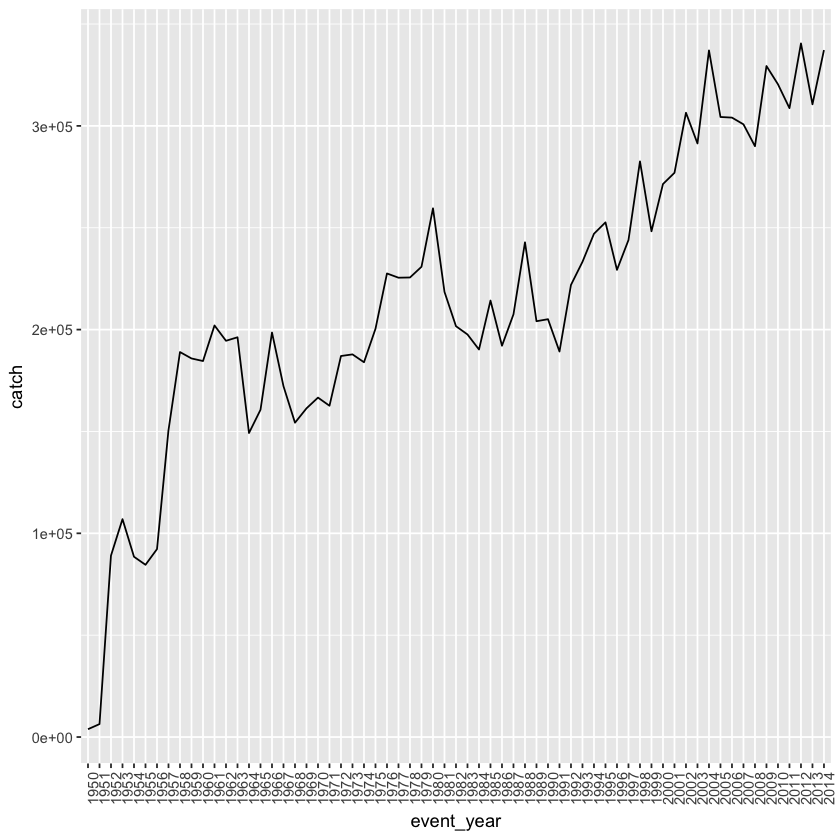

In [22]:

####### Aggregating Catches ####

# aggregating catches by year
yearly_catches <- all_tidy %>% 
  group_by(event_year) %>% 
  summarise(catch = sum(catch, na.rm = T))

# plotting total catch per year
ggplot(yearly_catches, aes(x=event_year, y = catch, group = 1)) + 
  geom_line() +
 # coord_cartesian(ylim = c(0,.2)) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

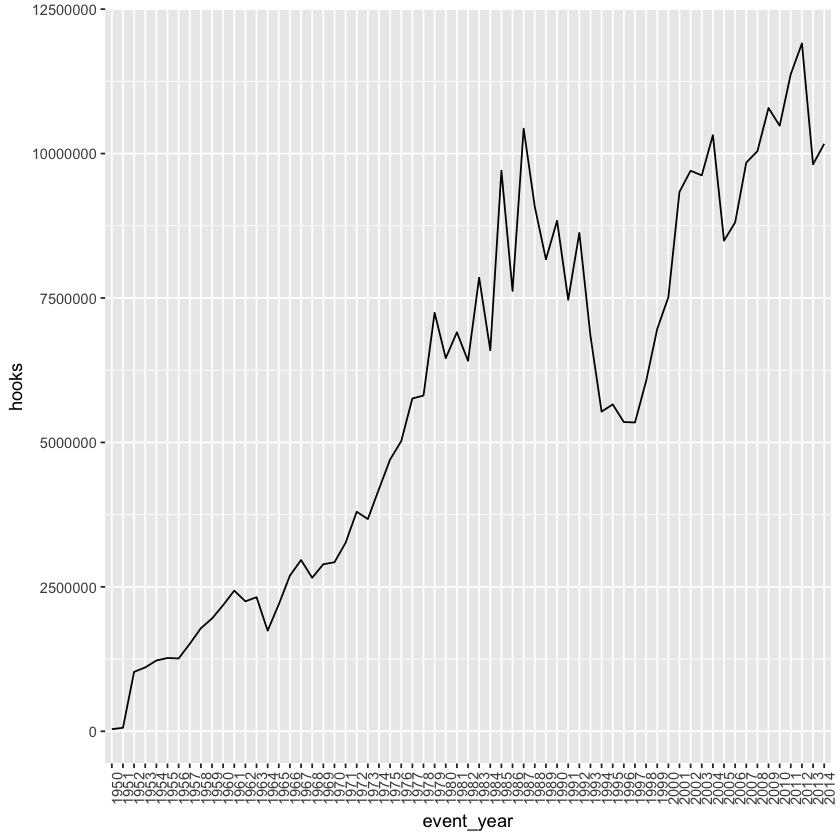

In [23]:
####### Aggregating Hooks ####


# aggregating hooks by year
yearly_hooks <- all_tidy %>% 
  group_by(event_year) %>% 
  summarise(hooks = sum(hooks, na.rm = T))

# plotting total hooks per year
ggplot(yearly_hooks, aes(x=event_year, y = hooks, group = 1)) + 
  geom_line() +
  #  coord_cartesian(ylim = c(0,.2)) +
  theme(axis.text.x=element_text(angle=90,hjust=1))


In [24]:
####### Averaging Spatial Catch ####

# computing the average catch per square for each year
yearly_spatial_avg_catch <- all_tidy %>% 
  group_by(event_year) %>% 
  summarise(mean_catch = mean(catch, na.rm = T))



In [25]:
####### Averaging Spatial Hooks ####


# computing the average hook per square for each year        
yearly_spatial_avg_hook <- all_tidy %>% 
  group_by(event_year) %>% 
  summarise(mean_hooks = mean(hooks, na.rm = T))


In [26]:
####### Averaging Spatial Catch Rate ####

yearly_spatial_avg_cr <- all_tidy %>% 
  group_by(event_year) %>% 
  summarise(mean_cr = mean(cr, na.rm = T))

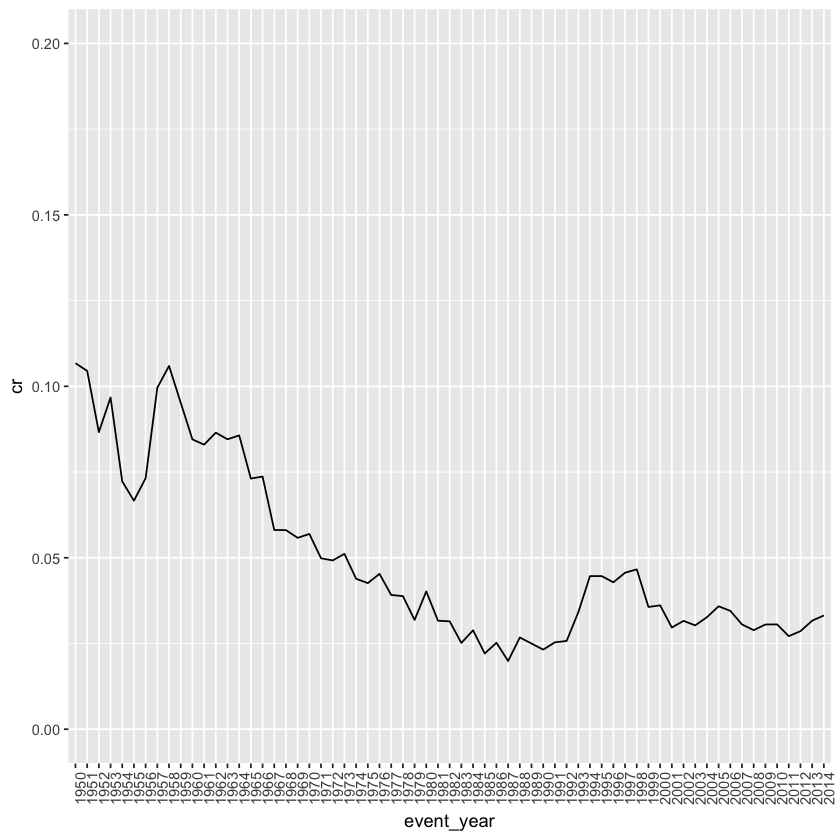

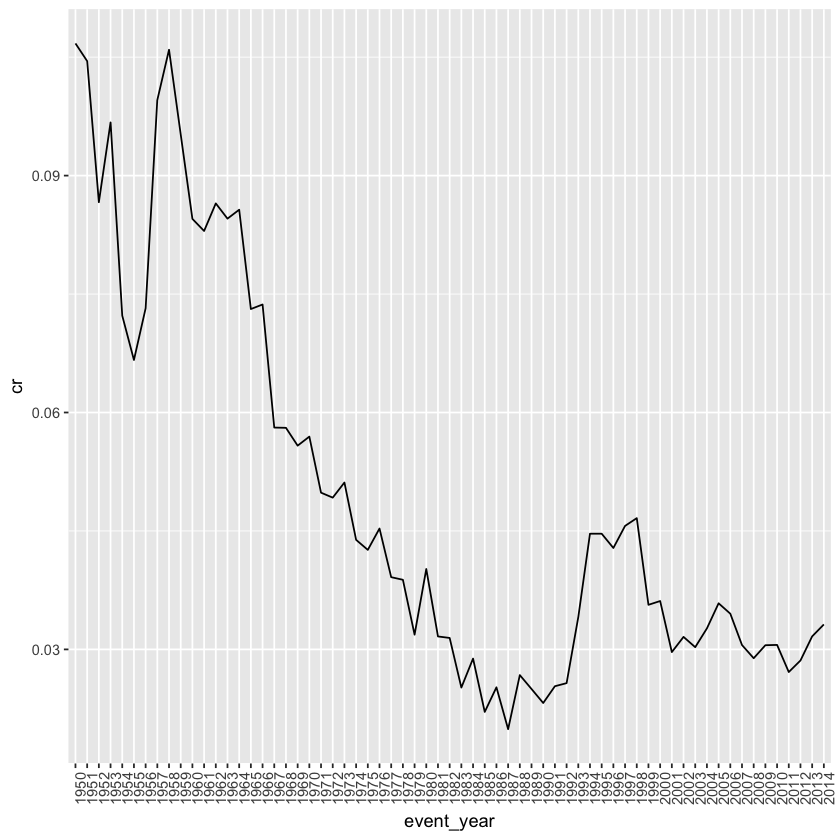

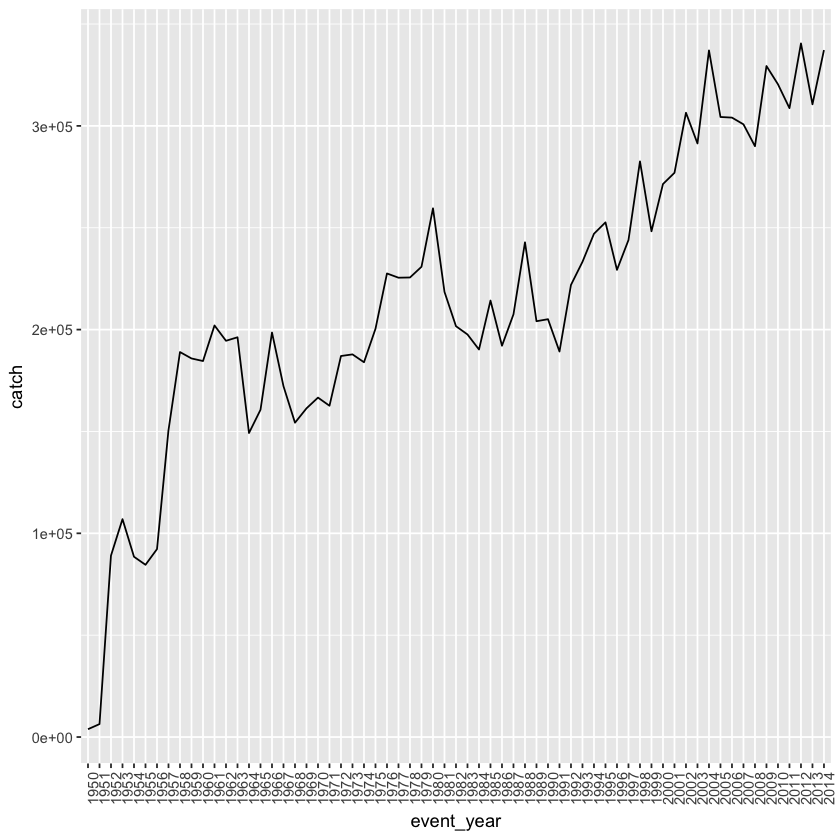

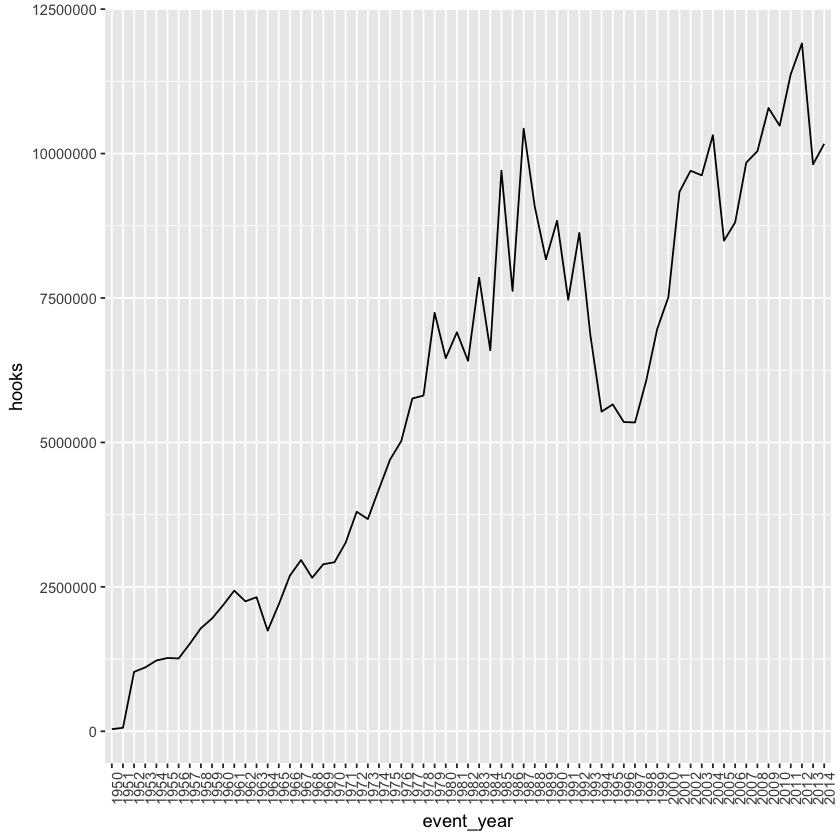

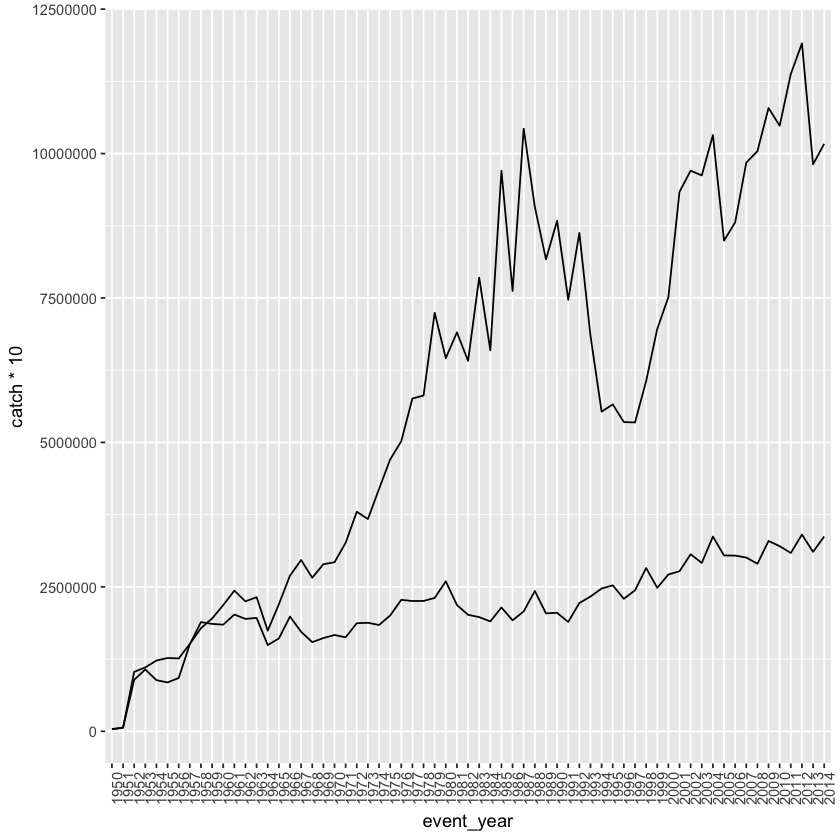

In [27]:
#######  Yearly Totals + Plots ####

## yearly catch rate (total)
# joining total yearly catches and total yearly hooks
yearly_totals <- inner_join(yearly_catches, yearly_hooks, by= "event_year")
yearly_totals <- yearly_totals %>% mutate(cr = catch / hooks)

# plot of yearly catch rate (total)
ggplot(yearly_totals, aes(x=event_year, y = cr, group = 1)) + 
  geom_line() +
  coord_cartesian(ylim = c(0,.2)) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

# plot of yearly totals broken down by variable
ggyearly_t <- ggplot(yearly_totals) + 
                theme(axis.text.x=element_text(angle=90,hjust=1))

ggyearly_t + geom_line(aes(x=event_year, y = cr, group = 1)) # cr
ggyearly_t + geom_line(aes(x=event_year, y = catch, group = 1)) # catches
ggyearly_t + geom_line(aes(x=event_year, y = hooks, group = 1)) # hooks

# All at once (really doesnt make sense to do)
# have to essentially scale up catch by 10x

ggyearly_t + # geom_line(aes(x=event_year, y = cr, group = 1)) + # cr
 geom_line(aes(x=event_year, y = catch*10, group = 1)) + # catches
 geom_line(aes(x=event_year, y = hooks, group = 1)) # hooks



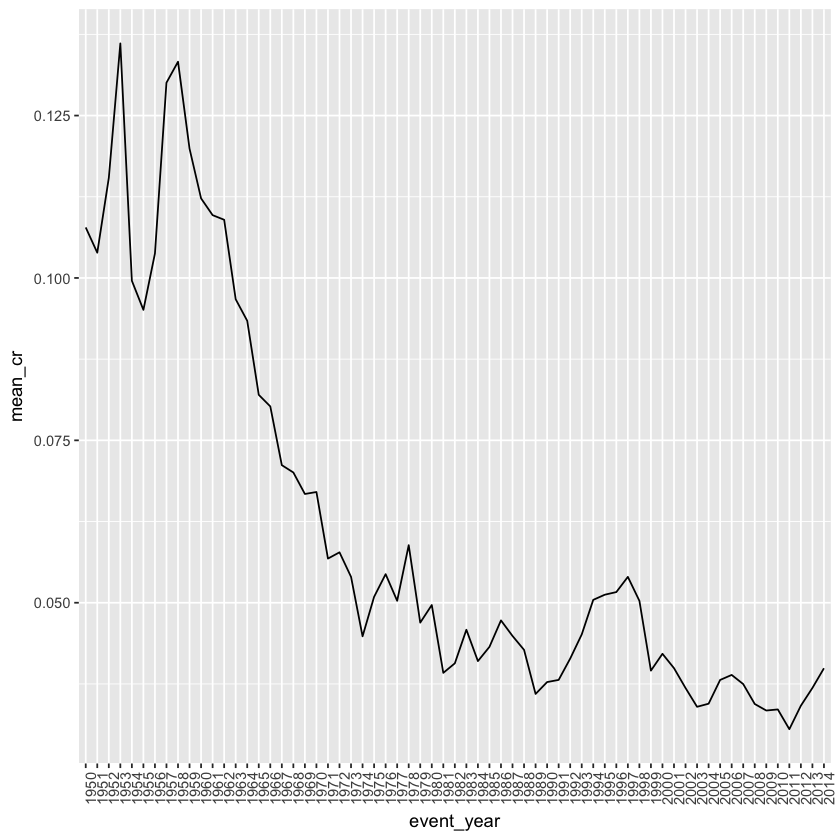

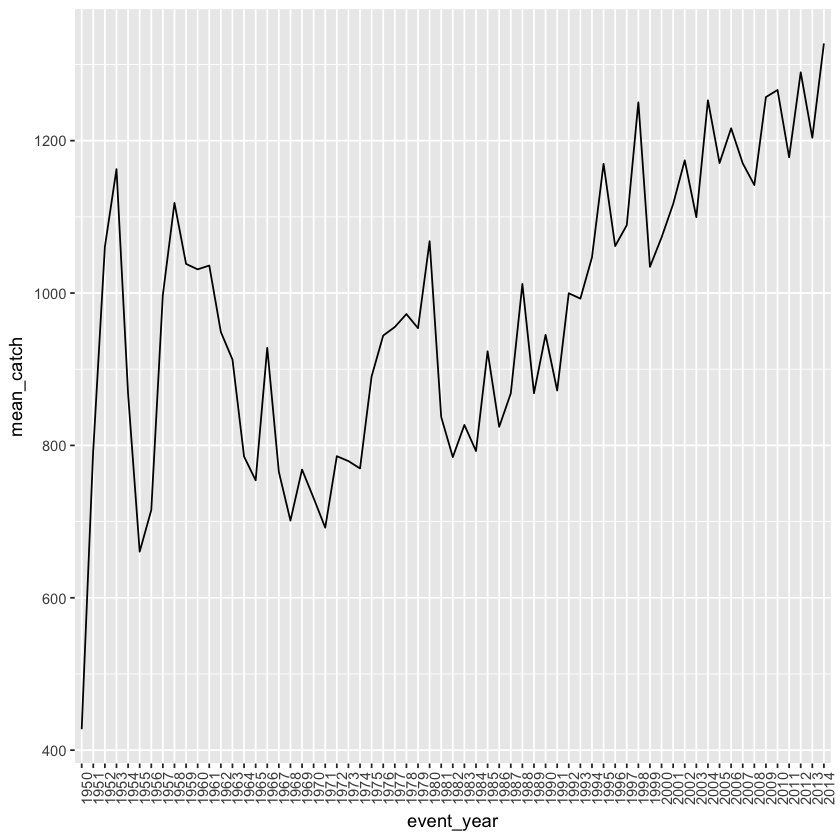

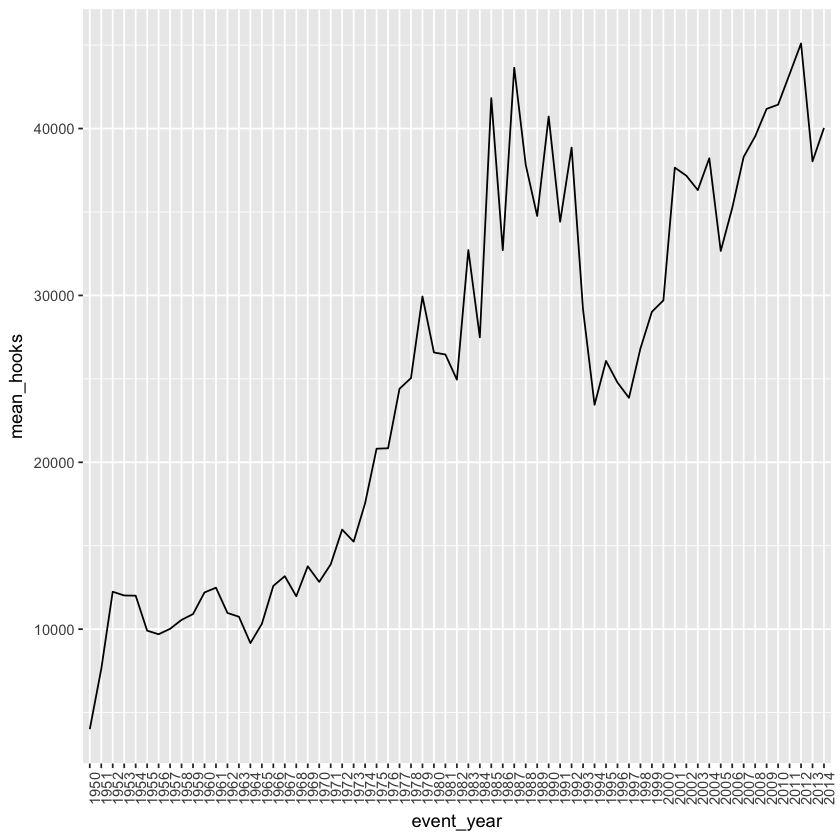

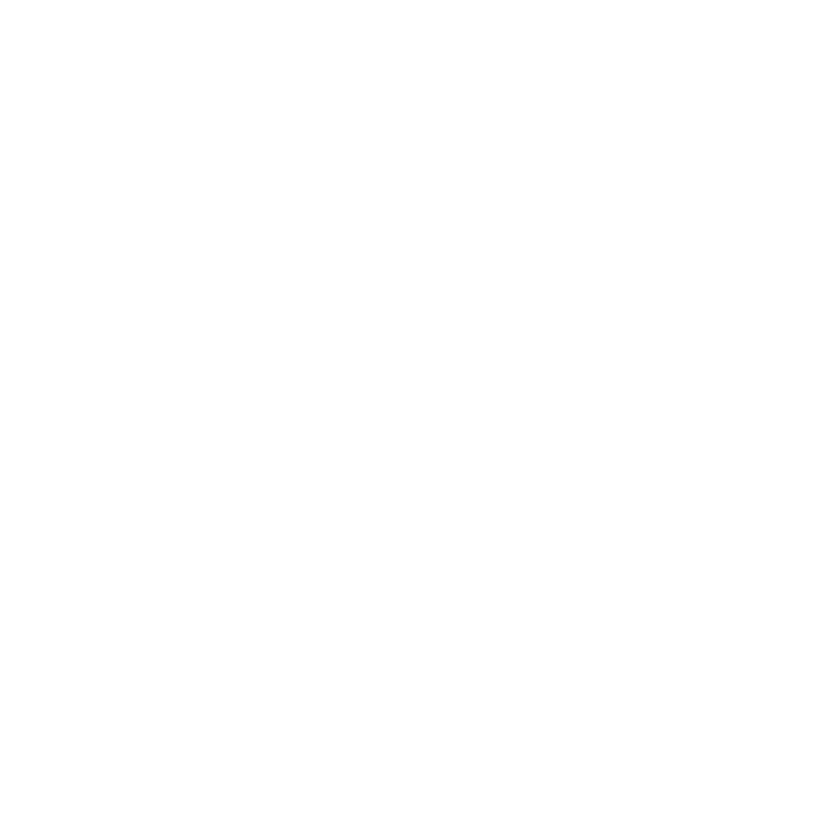

In [28]:
###### Yearly Spatial Averages + Plots ####


# joining avg yearly catches, avg yearly hooks, and avg yearly cr
# (can only join 2 at a time)
yearly_averages <- inner_join(yearly_spatial_avg_catch,
                              yearly_spatial_avg_hook,
                              by= "event_year")

yearly_averages <- inner_join(yearly_averages,
                              yearly_spatial_avg_cr,
                              by= "event_year")

# plot of yearly catch rate (average)
ggyearly_s <- ggplot(yearly_averages) + 
  theme(axis.text.x=element_text(angle=90,hjust=1)) 
#  geom_line(aes(x=event_year, y = mean_cr, group = 1))
#  scale_x_continuous(breaks = seq(1950,2014,5))
  

ggyearly_s + geom_line(aes(x=event_year, y = mean_cr, group = 1)) # cr
ggyearly_s + geom_line(aes(x=event_year, y = mean_catch, group = 1)) # catches
ggyearly_s + geom_line(aes(x=event_year, y = mean_hooks, group = 1)) # hooks


all_tidy %>% 
#  filter(event_year >= 2010) %>% 
  ggplot(aes(x = hooks, y = catch, color = event_year)) +
  geom_jitter() +
  scale_color_manual(values = ocean_pal)
 # geom_smooth(method = "lm", show.legend = T) +
 # xlim(0,150000)
  

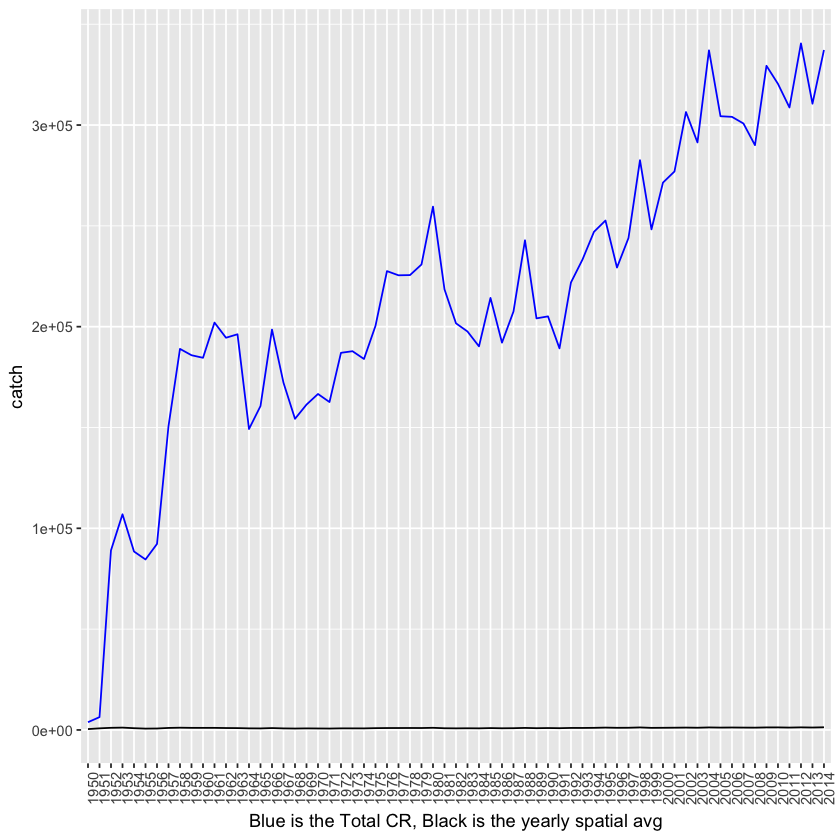

In [29]:

##### COMBINED ####

# comparing total cr to spatial mean_cr
ggplot(yearly_totals, aes(x=event_year, y = catch, group = 1)) +
  geom_line(color = "blue") +
  geom_line(data = yearly_averages, aes(y= mean_catch, group = 1)) +
  theme(axis.text.x=element_text(angle=90,hjust=1)) +
  xlab("Blue is the Total CR, Black is the yearly spatial avg")


In [30]:
###### checks using older data sets ####

# mean cr per year (spatial)
avg_cr_spatial <- cr_everything %>% 
  group_by(event_year) %>% 
  summarise(mean_cr = mean(cr, na.rm = T))

# plot of above average
ggplot(avg_cr_spatial, aes(x=event_year, y = mean_cr, group = 1)) + 
  geom_line() +
  coord_cartesian(ylim = c(0,.2)) +
  theme(axis.text.x=element_text(angle=90,hjust=1))







ERROR: Error in eval(expr, envir, enclos): object 'cr_everything' not found


In [32]:

################## COLOR PALETTES ###################

# custom pallet that has 25 values
ocean_pal <- colorRampPalette(c("light gray", "steel blue"))(65)
blRd_pal <- colorRampPalette(c("blue", "black"))(65)

# custom pallet try 2

ocean_custom <- colorRampPalette(brewer.pal(9,"PuBu"))(65)
diverge_custom <- colorRampPalette(brewer.pal(9,"Spectral"))(65)
redblue_custom <- colorRampPalette(brewer.pal(9,"RdBu"))(65)

# custom pallet try 3 - segmented
pal_1 <- colorRampPalette(c("dark gray", "cyan"))(4)
pal_2 <- colorRampPalette(c("aquamarine", "steel blue"))(10)
pal_3 <- colorRampPalette(c("blue", "black"))(10)

custom_pal <- c(pal_1,pal_2,pal_3)

# custom pallet try 4 - segmented 2

pal_4 <- colorRampPalette(c("blue", "dark blue"))(4)
pal_5 <- colorRampPalette(c("purple", "dark purple"))(10)
pal_6 <- colorRampPalette(c("gray", "black"))(10)

custom_pal2 <- c(pal_4,pal_5,pal_6)


ERROR: Error in col2rgb(colors, alpha = alpha): invalid color name 'dark purple'


In [33]:
################## DENSITY PLOTS ###################

# sexy chart of density for all years (minus 1950)
# pCR <- 
  ggplot(cr_all_tidy, aes(x = cr, color = event_year)) +
  geom_line(stat="density", position="identity", size = .5) +
  scale_x_continuous(name = "Catch Rate") + 
  scale_y_continuous(name = "Density (%)") + 
  coord_cartesian(xlim=c(0, .12)) +
  scale_color_manual(values = custom_pal2) +
#  scale_linetype_discrete() +
#  scale_size_discrete() + 
#  scale_colour_hue(h = c(180, 270))
# THEME 
  theme( legend.position = "none",
         panel.background = element_rect(fill = 'dark gray', colour = NA),
         plot.background = element_rect(fill = 'dark gray', colour = NA),
         panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         axis.line = element_line(colour = "white")
      ) +
  theme_bw() +
  theme( legend.position = "none")

ggplot(cr_all_tidy, aes(x = cr, group = event_year)) +
  geom_line(stat="density", position="identity", size = .5) +
  scale_x_continuous(name = "Catch Rate") + 
  scale_y_continuous(name = "Density (%)") + 
  coord_cartesian(xlim=c(0, .12)) +
#  scale_color_manual(values = custom_pal2)

  
###### From 1950   
  ggplot(cr_everything, aes(x = cr, color = event_year)) +
  geom_line(stat="density", position="identity", size = .5) +
  scale_x_continuous(name = "Catch Rate") + 
  scale_y_continuous(name = "Density (%)") + 
  scale_color_manual(values = ocean_pal) +
  coord_cartesian(xlim=c(0, .2)) 

###### From 1954

cr_everything %>%  
  filter(event_year > 1951) %>% 
  ggplot() +
  aes(x=cr, color = event_year) +
  geom_line(stat="density", position="identity", size = .5) + 
  scale_color_manual(values = diverge_custom) +
  coord_cartesian(xlim=c(0, .2)) 
  

  
  
  
# sexy chart of density 1960 - 2014
pCR_from1960 <- ggplot(cr_all_tidy, aes(x = cr, 
                                        colour = event_year, 
                                        frame = event_year,
                                        cumulative = TRUE)) +
  geom_line(stat="density", position="identity", size = 0.5) +
  scale_x_continuous(name = "Catch Rate") + 
  scale_y_continuous(name = "Density (%)") + 
  coord_cartesian(xlim=c(0, .12)) +
  scale_color_manual(values = ocean_pal) +
  #  scale_color_manual(values = ocean_custom) +
  #  ggtitle("Density plot of Yearly Catch Rates") +
  theme_bw() +
  theme(plot.title = element_text(size = 14, 
                                  family = "Tahoma", 
                                  face = "bold"),
        text = element_text(size = 12, 
                            family = "Tahoma"),
        legend.position = "right"
  ) 

# sexy chart of density for 1960 - 2000
pCR_1960_to_1990 <- ggplot(cr_older_tidy, aes(x = cr, colour = event_year)) +
  geom_line(stat="density", position="identity", size = 0.5) +
  scale_x_continuous(name = "catch / hundred hooks") +
  xlim(0,.12) 
+
  scale_color_manual(values = ocean_pal)

# easy access to check 1 year
cr_all_tidy %>% 
  filter(event_year > 2012) %>% 
  ggplot(aes(x = cr)) +  
  geom_density(color = cr_all_tidy$event_year) +
  coord_cartesian(xlim=c(0, .12), ylim=c(0,50))

head( cr_all_tidy %>% 
        filter(event_year < 1997)
)


ERROR: Error in ggplot(cr_all_tidy, aes(x = cr, color = event_year)): object 'cr_all_tidy' not found


In [ ]:
################## JOY plots ######################## 
  
  # # Update devtools
  install.packages("devtools")
  
  # # Install the ggjoy package
   devtools::install_github("clauswilke/ggjoy")
  
  # Load libraries
  
  library(ggjoy)
  
  # Create sample data
  # Note: It seems like `year` needs to be a factor?
  n <- 20
  year <- rep(2004:2017, each = n)
  cr <- rbeta(length(unique(year)) * n, 1/2, 1)
  df <- data.frame(year = factor(year), cr = cr)
  
  
  cr_correct <- mutate(cr_tidy, event_year1 = factor(event_year, levels = rev(levels(event_year))))
  # Create a joy plot.
  # Use scale = #.# to control the overlap
  cr_10to14 <- cr_all_tidy %>% filter(event_year > 2009)
  
  
### this is the joy plot to use  
  ggplot(cr_all_tidy, 
         aes(x = cr, y = event_year, group = event_year, 
             fill = event_year, height = ..density..)) + 
    geom_joy(stat="density", scale = 15, color = "black" ) + 
    theme_joy() +
    coord_cartesian(xlim = c(0, .6)) + 
    scale_fill_manual(values = ocean_pal)
#    scale_y_reverse(breaks = 2004:2017, labels = 2004:2017)
  # Comment the above line and uncomment the line below to 
  # have latest year at the top.
  # scale_y_continuous(breaks = 2004:2017, labels = 2004:2017)
  
  
  #### ALL DATA 
  ggplot(cr_everything, 
         aes(x = cr, y = event_year, group = event_year, 
             fill = event_year, height = ..density..)) + 
    geom_joy(stat="density", scale = 15, color = "black" ) + 
    theme_joy() +
  #  coord_cartesian(xlim = c(0, .6)) + 
    scale_fill_manual(values = ocean_pal)
  
graph_this <- cr_everything %>%
                filter(event_year > 1953) %>% 
                ggplot()

graph_this +  geom_joy(stat="density", scale = 15, color = "black",
                       aes(x = cr, y = event_year, group = event_year, 
             fill = event_year, height = ..density..)) +
    coord_cartesian(xlim = c(0, .2)) + 
    scale_fill_manual(values = ocean_pal)
  
  
  
  
### Joy plot Attempt with density dfs
  
  ggplot(test_95n99, aes(x = y, y = z, group = z, fill = z)) + 
    geom_joy(scale = 5, bandwidth = 0.0015) + 
    theme_joy() +
    xlim(0,0.075) +
    scale_fill_manual(values = ocean_pal)
  
  ggplot(den00) + geom_joy()
  
  test_95n99
  
 
  
